In [1]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.integrate import solve_ivp
from scipy import integrate
from scipy.optimize import fsolve
from IPython.display import IFrame

In [4]:
file = 'Parabolico.pdf'
IFrame(file, width=500,height=300)

In [5]:
def System(t, r0, g = 9.8):
    
    x,y,vx,vy = r0
    ax = 0.
    ay = -g
    
    return np.array([vx,vy,ax,ay])

In [13]:
v0 = 90.
alpha = np.deg2rad(60)

r0 = np.array([0.,0.,v0*np.cos(alpha),v0*np.sin(alpha)])

In [14]:
N = 10
t = np.linspace(0.,5.,N+1)
print(t)

[0.  0.5 1.  1.5 2.  2.5 3.  3.5 4.  4.5 5. ]


In [15]:
%%time
solution = solve_ivp( System, (t[0],t[-1]), r0, t_eval = t, method = 'RK45' )

CPU times: user 3.41 ms, sys: 0 ns, total: 3.41 ms
Wall time: 2.81 ms


In [29]:
t = solution.t
x = solution.y[0]
y = solution.y[1]
vx = solution.y[2]

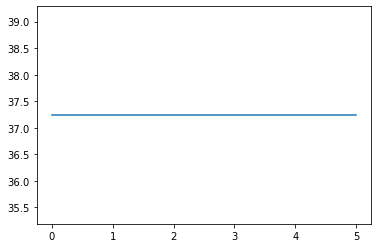

In [30]:
plt.plot(t,vx)

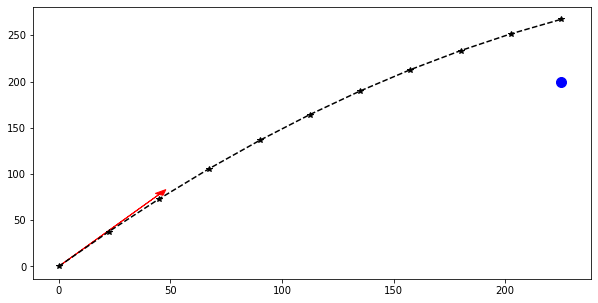

In [17]:
fig = plt.figure(figsize=(10,5))
ax = fig.add_subplot(111)
ax.plot(x,y,'--',marker='*',color='k')
plt.scatter(v0*np.cos(alpha)*t[-1],200.,color='b',s=100)
plt.arrow(0,0,r0[2],r0[3],color='r',head_width=4)
#plt.savefig('Parabolico.pdf')

In [20]:
def Root(x0):
    
    v0 = x0[0]
    
    r0 = np.array([0.,0.,v0*np.cos(alpha),v0*np.sin(alpha)])
    
    solution = solve_ivp( System, (t[0],t[-1]), r0, t_eval = t, method = 'RK45' )
    
    y = solution.y[1]
    
    return [y[-1] - 200.]

In [25]:
v0, = fsolve(Root, [100])
print(v0)

74.4781847254617


In [27]:
r0 = np.array([0.,0.,v0*np.cos(alpha),v0*np.sin(alpha)])
solution = solve_ivp( System, (t[0],t[-1]), r0, t_eval = t, method = 'RK45' )
t = solution.t
x = solution.y[0]
y = solution.y[1]

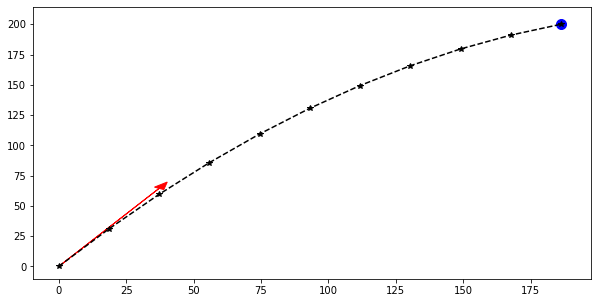

In [28]:
fig = plt.figure(figsize=(10,5))
ax = fig.add_subplot(111)
ax.plot(x,y,'--',marker='*',color='k')
plt.scatter(v0*np.cos(alpha)*t[-1],200.,color='b',s=100)
plt.arrow(0,0,r0[2],r0[3],color='r',head_width=4)